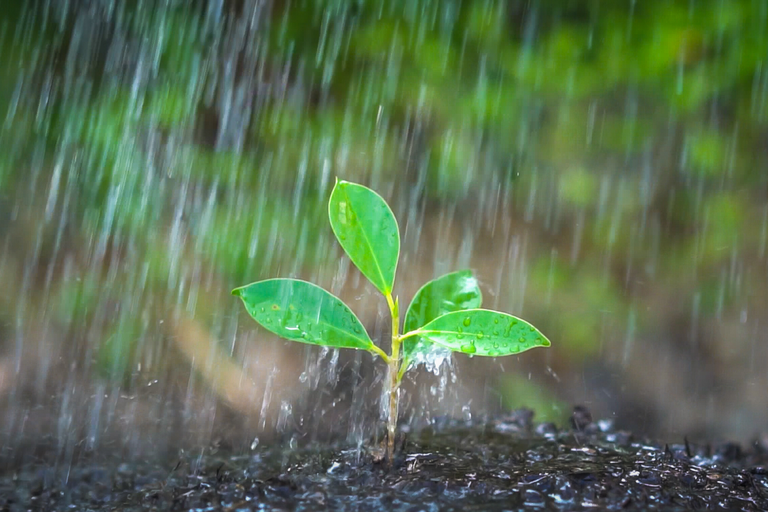

# Desenvolvimento de Projeto de Machine Learning - Estudo sobre Precipitações no Brasil
## Patrícia Kovalski

    A previsão de fatos metereológicos está muito presente nas nossas vidas há muito tempo. Então, pela facilidade de acessarmos essa informação, podemos não nos dar conta da quantidade de dados que estão por trás desse resultado. 
    Nesse estudo, utilizando dados do INMET (Instituto Nacional de Metereologia) coletados desde 1961 até 2019 nas diversas estações meteorológicas brasileiras, analisarei as diversas variáveis do Dataset. Será mantida a "Precipitação" como variável dependente, a fim de gerar um modelo de Machine Learning que faça uma boa previsão da ocorrência de chuvas.

## Leitura e Tratamento do Dados

In [1]:
import pandas as pd

In [2]:
# Leitura do DataFrame
df_tempo = pd.read_csv('conventional_weather_stations_inmet_brazil_1961_2019.csv', sep = ';')

In [3]:
df_tempo.head()

,Estacao,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVento,Insolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 19
0,82024,01/01/1961,0,NaN,NaN,NaN,32.3,NaN,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,26.56,82.5,3.000000,NaN
1,82024,01/01/1961,1200,NaN,26.0,23.9,NaN,22.9,83.0,994.2,NaN,5.0,5.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2,82024,01/01/1961,1800,NaN,32.3,27.0,NaN,NaN,65.0,991.6,NaN,5.0,3.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN
3,82024,02/01/1961,0,NaN,25.8,24.6,33.2,NaN,91.0,991.9,NaN,9.0,1.0,10.0,7.0,NaN,28.06,77.5,5.666667,NaN
4,82024,02/01/1961,1200,16.0,26.8,24.0,NaN,23.7,78.0,995.0,NaN,5.0,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Tamanho do DataFrame
df_tempo.shape

(12251335, 20)

In [5]:
# Verificando variáveis com mais valores nulos
df_tempo.count().sort_values()

Unnamed: 19                         0
Insolacao                     3581961
Evaporacao Piche              3720240
Temp Comp Media               3722761
Umidade Relativa Media        3748244
Velocidade do Vento Media     3830256
PressaoAtmMar                 3872455
TempMaxima                    3950922
TempMinima                    3959136
Precipitacao                  4120755
PressaoAtmEstacao             9945997
DirecaoVento                 11029949
VelocidadeVento              11231806
TempBulboUmido               11311867
UmidadeRelativa              11404787
TempBulboSeco                11791764
Nebulosidade                 11817910
Hora                         12251335
Data                         12251335
Estacao                      12251335
dtype: int64

In [6]:
# Retirando as variáveis com menos observações que a variável Precipitacao
# Retirando as variáveis Data, Estacao e Hora porque não queremos saber de dias ou locais específicos
df_tempo_br = df_tempo.drop(columns=['Unnamed: 19', 'Insolacao', 'Evaporacao Piche', 'Temp Comp Media', 'Umidade Relativa Media',
                                    'Velocidade do Vento Media', 'PressaoAtmMar', 'TempMaxima', 'TempMinima', 'Data',
                                    'Estacao', 'Hora'],axis=1)

In [7]:
# Retirando os valores nulo do DataFrame
df_tempo_br = df_tempo_br.dropna(how='any')
df_tempo_br.shape

(2978261, 8)

In [8]:
# Removendo Outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_tempo_br))
print(z)

[[1.11760816 0.7946642  0.93908689 ... 0.72208403 2.61884753 0.29930001]
 [0.36633257 0.7946642  0.91436862 ... 0.35293034 2.61884753 0.29930001]
 [0.36633257 0.73011751 1.06267822 ... 0.35293034 2.61884753 0.29930001]
 ...
 [1.54424113 0.06313502 0.02492552 ... 0.35293034 0.62091291 0.58249973]
 [0.36633257 0.53647743 0.17323512 ... 0.72208403 0.0145036  1.68309801]
 [0.36633257 0.92375758 0.29682645 ... 0.72208403 0.06876077 1.68309801]]


In [9]:
threshold = 3
print(np.where(z > 3))

(array([      3,      15,      19, ..., 2978201, 2978207, 2978209],
      dtype=int64), array([6, 6, 6, ..., 3, 3, 3], dtype=int64))


In [10]:
df_tempo_br = df_tempo_br[(z < 3).all(axis=1)]
print(df_tempo_br.shape)

(2816300, 8)


In [11]:
# Alterando a quantidade de chuva marcada por valores booleanos, apenas para marcar se choveu ou não
def Precipitacao(item):
    if item > 0:
        return True
    else:
        return False

In [12]:
df_tempo_br['Precipitacao'] = df_tempo_br['Precipitacao'].map(Precipitacao)

In [13]:
df_tempo_br.head()

,Precipitacao,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade
4,True,26.8,24.0,78.0,995.0,5.0,7.0,7.0
7,False,26.8,23.9,76.0,995.6,9.0,7.0,7.0
10,False,26.5,24.5,84.0,994.4,9.0,7.0,7.0
16,False,27.0,24.8,83.0,994.0,5.0,7.0,7.0
19,False,26.1,24.2,85.0,994.3,5.0,3.0,7.0


## Correlação entre as Variáveis

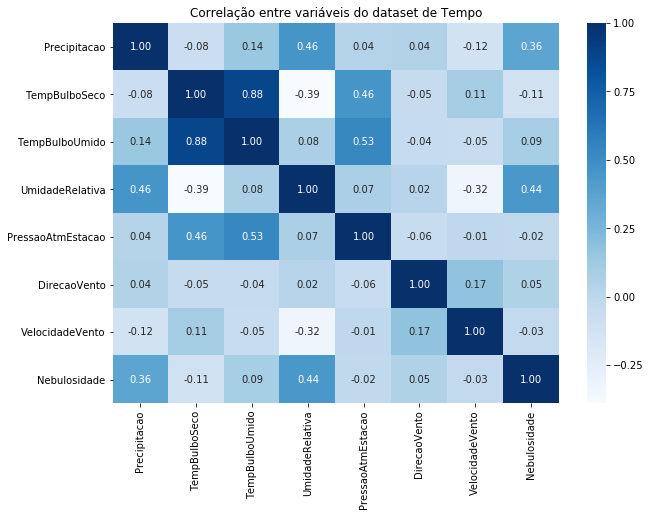

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(df_tempo_br.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de Tempo')
plt.show()

In [15]:
# As maiores correlações com Precipitacao são UmidadeRelativa e Nebulosidade
# Vamos visualizar um gráfico de dispersão com essas 3 variáveis

## Visualização de Dados

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Nebulosidade')

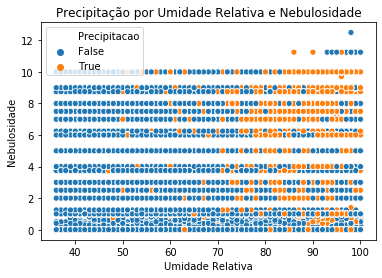

In [17]:
grafico_precipitacao = sns.scatterplot(x="UmidadeRelativa", y="Nebulosidade", hue="Precipitacao", data=df_tempo_br)
grafico_precipitacao.get_figure()
plt.title('Precipitação por Umidade Relativa e Nebulosidade')
plt.xlabel('Umidade Relativa')
plt.ylabel('Nebulosidade')

In [18]:
# Visualmente identificamos tendência de chuva em condições de umidade relativa mais elevada

## Aplicação de Machine Learning

    Serão realizados 3 algoritmos de Aprendizado Supervisionado de Máquina:
    1) Regressão Logística: utilizado para problemas de classificação entre duas classes
    2) Floresta Aleatória: gera várias árvores de decisão combinadas para obter uma predição com maior acurácia
    3) Árvore de Decisão: classifica a população em conjuntos

In [19]:
df = df_tempo_br[['Precipitacao', 'UmidadeRelativa']]
X = df[['UmidadeRelativa']]
y = df[['Precipitacao']]

In [20]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_logreg = LogisticRegression(random_state=0)
clf_logreg.fit(X_train,y_train)
y_pred = clf_logreg.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Acurácia :',score*100)

C:\Users\patri\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia : 73.64883002521039


In [21]:
# Floresta Aleatória 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Acurácia :',score*100)

C:\Users\patri\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Acurácia : 73.61928771792778


In [22]:
# Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Acurácia :',score*100)

Acurácia : 73.59585271455455


In [23]:
# Os 3 algoritmos de Machine Learning utilizados apresentaram acurácia próxima de 70%

## Conclusão

    Nos três modelos de Aprendizado de Máquina Apresentados tentamos prever a precipitação a partir da umidade relativa, visto que essa variável mostrou ter maior correlação com as chuvas. Assim, em todos os modelos tivemos um resultado de acurácia acima de 70%, o que demonstra a boa aplicabilidade do modelo escolhido.